In [1]:
import pandas as pd
import numpy as np

### 1.Data Import

In [2]:
df = pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')
df_t = pd.read_csv('../data/house-prices-advanced-regression-techniques/test.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df = df.drop(columns=['Id'])

### 2. Removing columns that has more than 50% empty cells

In [5]:
threshold = 0.5 
columns_to_drop = []

for col in df.columns:
    missing_percentage = df[col].isna().mean()  # Calculate the percentage of missing values
    if missing_percentage >= threshold:
        columns_to_drop.append(col)
    # print(col, ":", f'{missing_percentage*100:.0f}%')

df = df.drop(columns=columns_to_drop)
# columns_to_drop

In [6]:
df.shape

(1460, 76)

### 3. Removing columns that have a repeated values more that 90% times

In [7]:
threshold = 0.9 * len(df)
columns_to_drop = []

for column in df.columns:
    if df[column].value_counts().max() > threshold:
        # print(column) #, '\n',df[column].value_counts())
        columns_to_drop.append(column)

df = df.drop(columns=columns_to_drop)

In [8]:
df.shape

(1460, 58)

### 4.Undrestanding data

In [9]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars   

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/wf/x0xp_htj2zg5fpdgckzglrlr0000gn/T/ipykernel_15731/3944980836.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

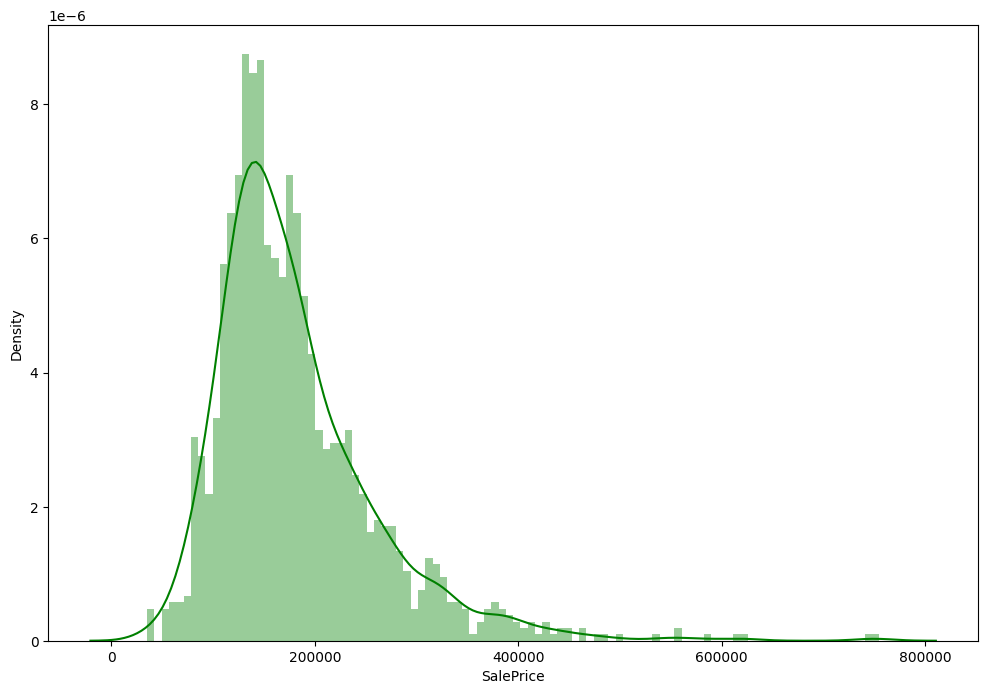

In [11]:
plt.figure(figsize=(12 ,8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

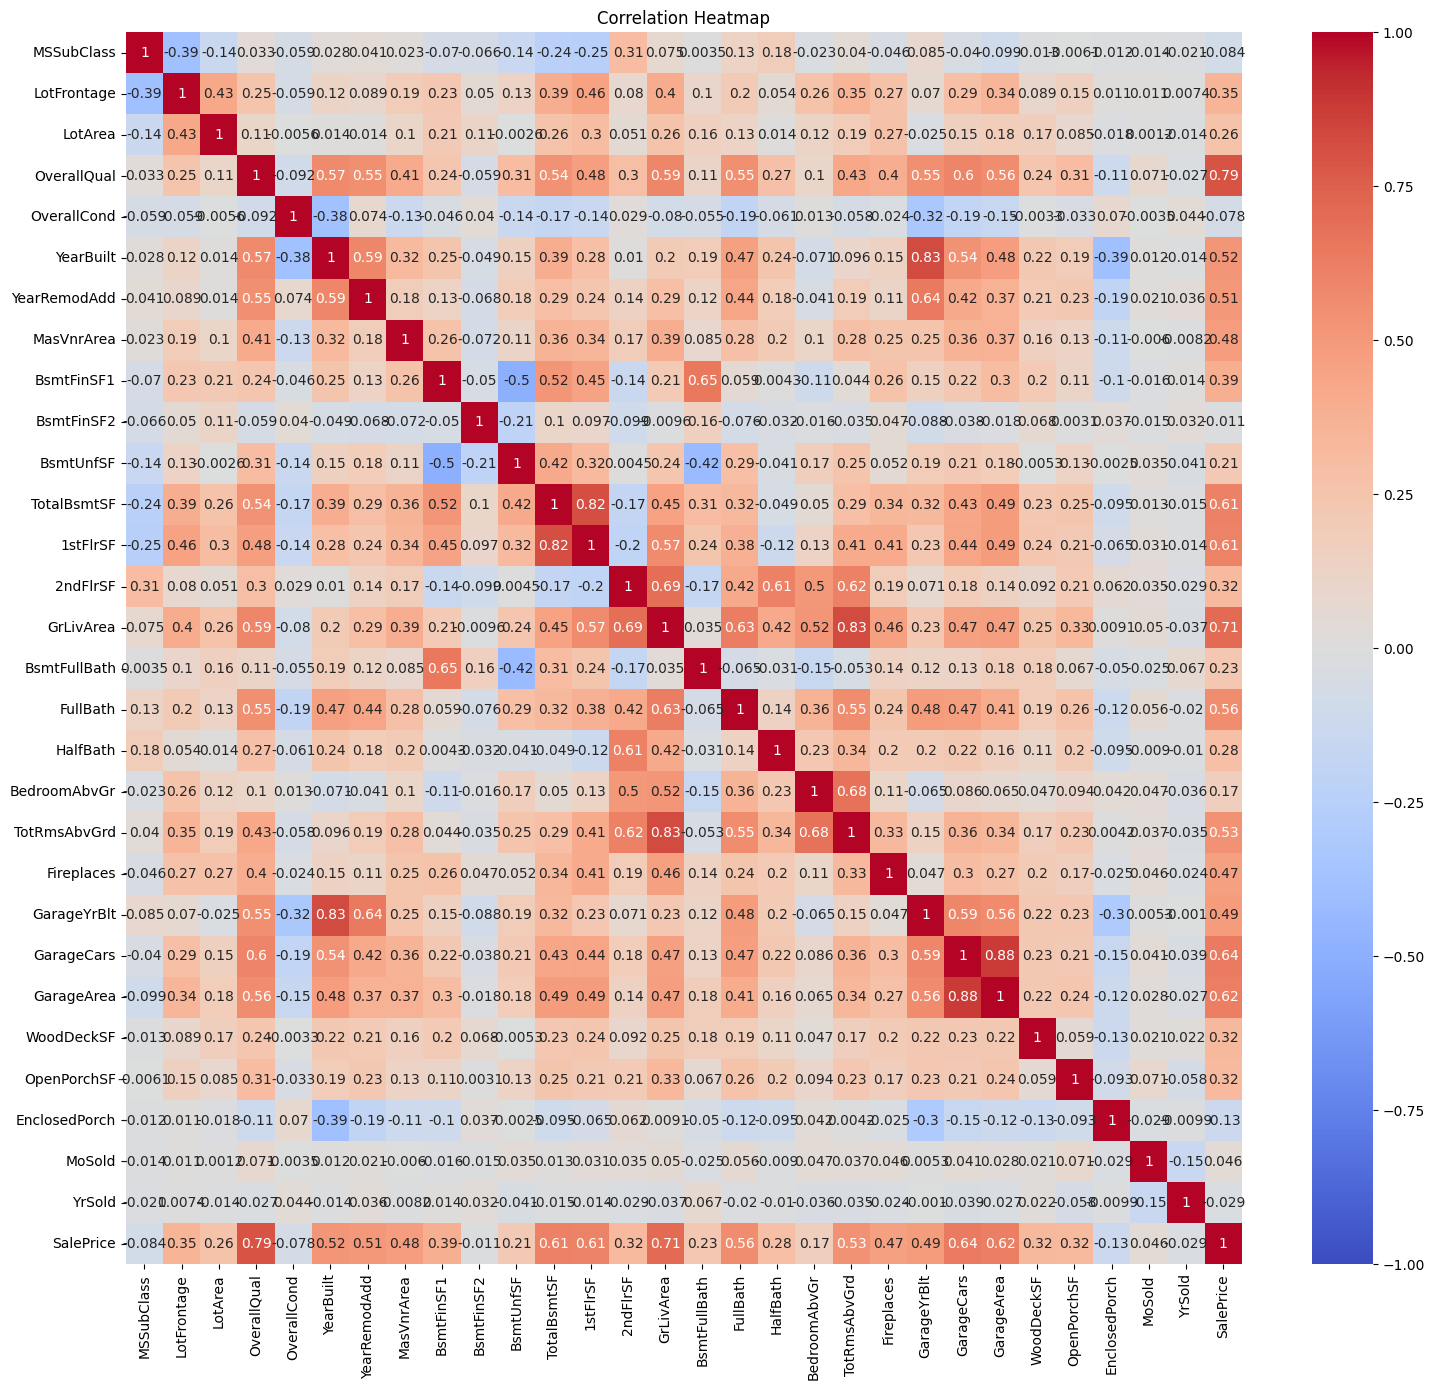

In [12]:
plt.figure(figsize=(18, 16))
sns.heatmap(df.select_dtypes(include = ['float64', 'int64']).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### 5. Prepare data

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [14]:
encoder = OneHotEncoder(sparse_output=False)

In [15]:
df.select_dtypes(include = ['object']).head()

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,...,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,...,GLQ,Unf,Ex,Gd,NaN,Attchd,RFn,TA,WD,Normal
1,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,...,ALQ,Unf,Ex,TA,TA,Attchd,RFn,TA,WD,Normal
2,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,...,GLQ,Unf,Ex,Gd,TA,Attchd,RFn,TA,WD,Normal
3,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,...,ALQ,Unf,Gd,Gd,Gd,Detchd,Unf,TA,WD,Abnorml
4,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,...,GLQ,Unf,Ex,Gd,TA,Attchd,RFn,TA,WD,Normal


In [16]:
from joblib import dump, load

for i in df.select_dtypes(include = ['object']).columns:
    label = LabelEncoder()
    df[i] = label.fit_transform(df[i])
    dump(label, 'encoders/'+i+'.pkl')

In [17]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,3,3,4,5,2,0,...,548,4,0,61,0,2,2008,8,4,208500
1,20,3,80.0,9600,3,3,2,24,1,0,...,460,4,298,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,0,3,4,5,2,0,...,608,4,0,42,0,9,2008,8,4,223500
3,70,3,60.0,9550,0,3,0,6,2,0,...,642,4,0,35,272,2,2006,8,0,140000
4,60,3,84.0,14260,0,3,2,15,2,0,...,836,4,192,84,0,12,2008,8,4,250000


In [18]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()

In [24]:
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

# XGBoost

In [25]:
import xgboost as xgb

In [26]:
xgb_reg = xgb.XGBRegressor(n_jobs=-1)

In [27]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [28]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [29]:
y_pred_test = xgb_reg.predict(X_test)
r2score = round(r2_score(y_pred_test,y_test),2)*100
print("R2 Score on Test Data is,", r2score)

R2 Score on Test Data is, 89.0


In [30]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

In [31]:
import math
mse = mean_squared_error(y_test, y_pred_test)

rmse = round(math.sqrt(mse), 2)

print(rmse)

26990.42


In [32]:
compute_rmsle(y_test, y_pred_test)

0.15

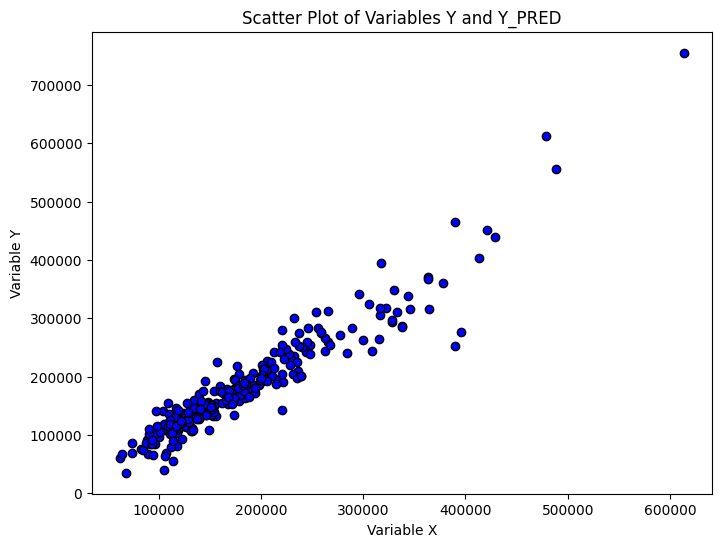

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, list(y_test), color='blue', edgecolors='black') #, label=f"Correlation: {correlation:.2f}")
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Scatter Plot of Variables Y and Y_PRED')
# plt.legend()
plt.grid(False)
plt.show()

### HyperParameter Tuning | RandomizedSearchCV

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
params = {
'n_estimators' : [100, 150, 200, 250, 300, 350, 400, 500, 750, 800, 850], # no of trees
'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.25, 0.5], # eta
'min_child_weight': [1, 5, 7, 10],
'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
'subsample': [0.6, 0.8, 1.0],
'colsample_bytree': [0.6, 0.8, 0.9, 1.0],
'max_depth': [3, 4, 5, 10, 12, 15, 20]
}
folds = 5
param_comb = 100

random_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=folds, verbose=3, random_state=42)
# Fitting on the validation set
random_search.fit(X_test, y_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 3/5] END colsample_bytree=0.9, gamma=2, learning_rate=0.04, max_depth=20, min_child_weight=10, n_estimators=500, subsample=1.0;, score=0.827 total time=   1.6s
[CV 2/5] END colsample_bytree=0.9, gamma=2, learning_rate=0.04, max_depth=20, min_child_weight=10, n_estimators=500, subsample=1.0;, score=0.802 total time=   1.5s
[CV 1/5] END colsample_bytree=0.9, gamma=2, learning_rate=0.04, max_depth=20, min_child_weight=10, n_estimators=500, subsample=1.0;, score=0.776 total time=   1.6s
[CV 2/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.25, max_depth=20, min_child_weight=7, n_estimators=350, subsample=1.0;, score=0.809 total time=   1.6s
[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.25, max_depth=20, min_child_weight=7, n_estimators=350, subsample=1.0;, score=0.772 total time=   1.7s
[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.25, max_depth=20, min_child_weight=7, n_estimators=35

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04, 0.05, 0.1, 0.25,
                                                          0.5],
                                        'max_depth': [3, 4, 5, 10, 12, 15, 20],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 500,
                                                         750, 800, 850],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=3)

In [36]:
print ('We can get score of :', random_search.best_score_,' using', random_search.best_params_)

We can get score of : 0.853897558446936  using {'subsample': 0.8, 'n_estimators': 800, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.03, 'gamma': 0.5, 'colsample_bytree': 0.6}


In [37]:
xgb_reg_hpt = xgb.XGBRegressor(subsample = random_search.best_params_['subsample'], n_estimators = random_search.best_params_['n_estimators'], min_child_weight = random_search.best_params_['min_child_weight'], max_depth = random_search.best_params_['max_depth'], learning_rate = random_search.best_params_['learning_rate'], gamma = random_search.best_params_['gamma'], colsample_bytree = random_search.best_params_['colsample_bytree'], n_jobs = -1)

In [38]:
xgb_reg_hpt.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [39]:
y_pred_test_hpt = xgb_reg_hpt.predict(X_test)

r2_score = round(r2_score(y_pred_test_hpt,y_test),2)*100

In [40]:
r2_score

89.0

In [41]:
compute_rmsle(y_test, y_pred_test_hpt)

0.14

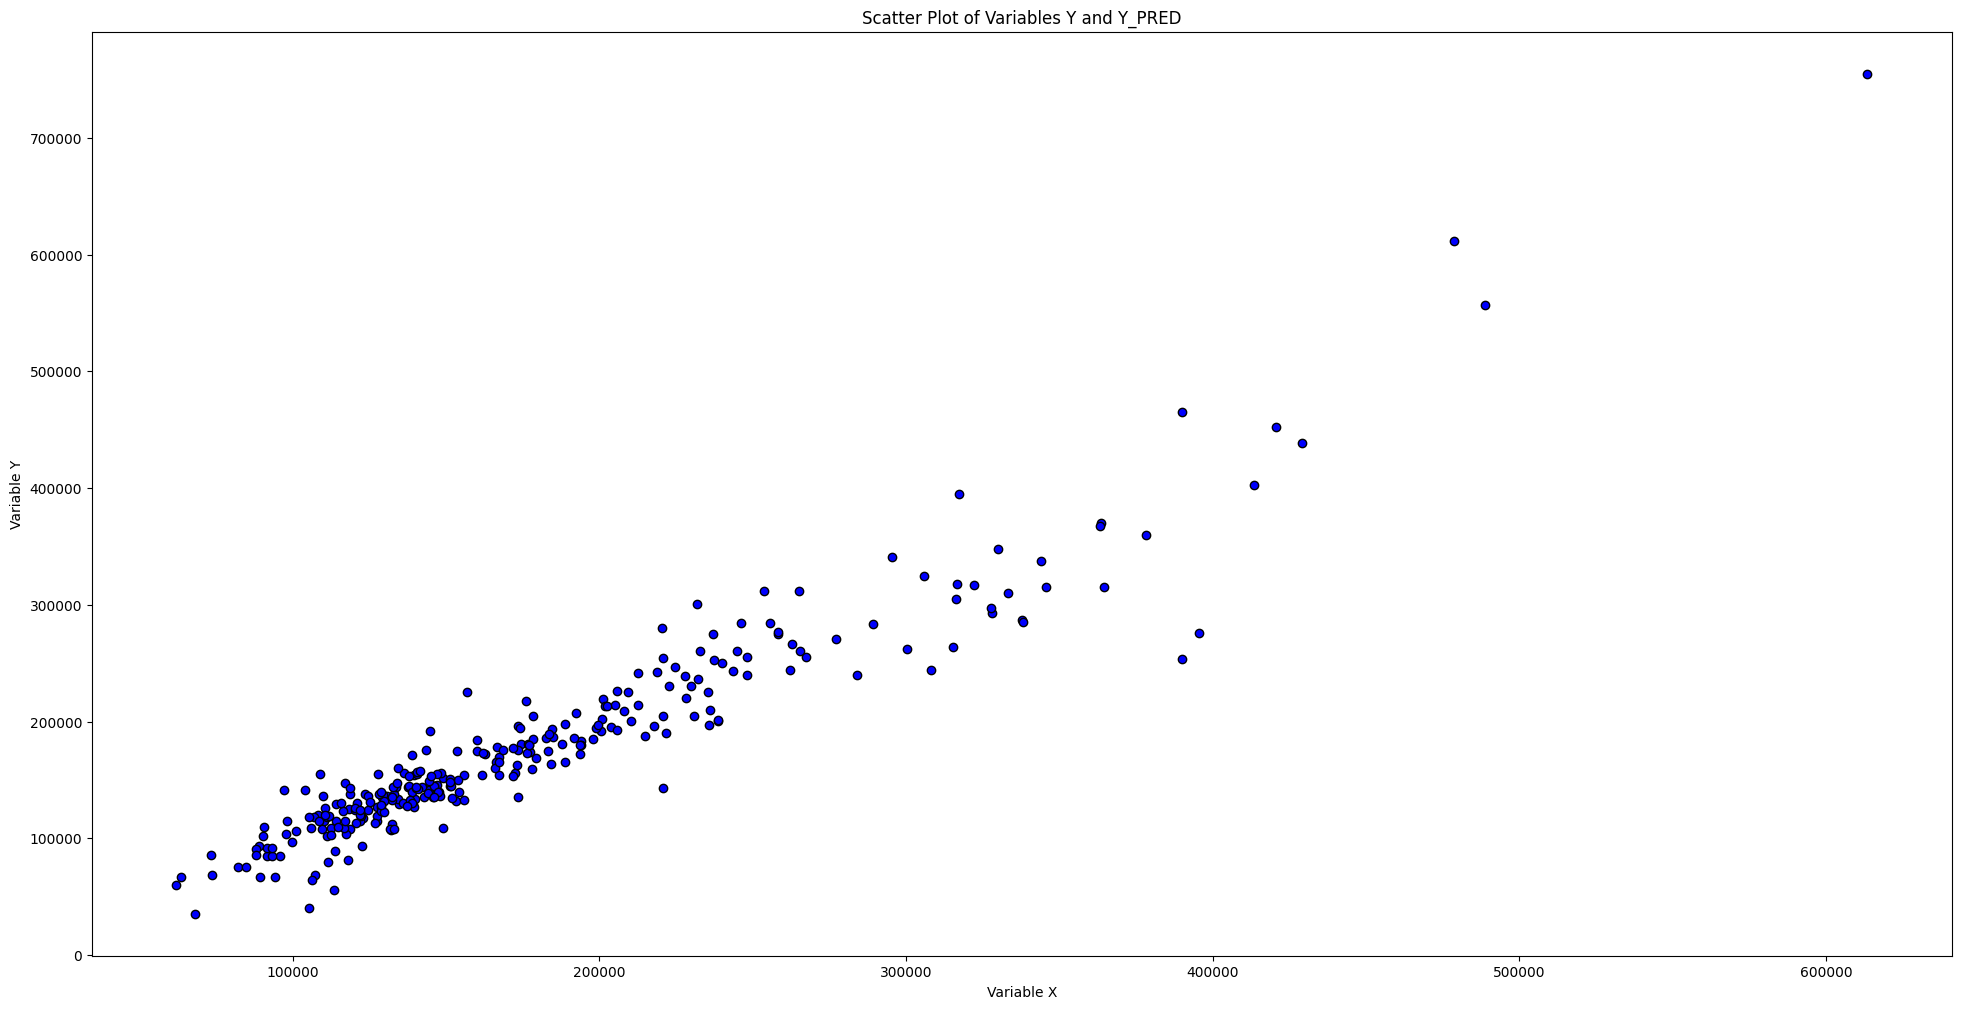

In [39]:
plt.figure(figsize=(24, 12))
plt.scatter(y_pred_test, list(y_test), color='blue', edgecolors='black') #, label=f"Correlation: {correlation:.2f}")
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Scatter Plot of Variables Y and Y_PRED')
# plt.xlim(0, 100000)
# plt.ylim(0, 100000)
# plt.legend()
plt.grid(False)
plt.show()

# TF Model

In [40]:
import tensorflow_decision_forests as tfdf

In [41]:
df = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv")

In [42]:
dataset_df = df.drop(columns=['Id'])

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = dataset_df.drop(columns=['SalePrice'])
y = dataset_df['SalePrice']

In [45]:
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

X_train, X_test = split_dataset(dataset_df)

In [46]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test, label=label, task = tfdf.keras.Task.REGRESSION)

2024-07-16 16:38:00.038068: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-07-16 16:38:00.038125: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-07-16 16:38:00.038192: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-07-16 16:38:00.038771: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-16 16:38:00.038807: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [47]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [48]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
# rf.compile(metrics=["mse"])

Use /var/folders/wf/x0xp_htj2zg5fpdgckzglrlr0000gn/T/tmpke317gk2 as temporary training directory


In [49]:
rf.fit(x=train_ds)

# Test Data

In [108]:
ids = df_t['Id']
df_t = df_t[df.drop(columns=['SalePrice']).columns]

In [77]:
enc = load('encoders/' + 'FireplaceQu.pkl')

In [78]:
enc.classes_

array(['Ex', 'Fa', 'Gd', 'Po', 'TA', nan], dtype=object)

In [109]:
df_t['FireplaceQu'].value_counts()

Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64

In [110]:
list(df_t['FireplaceQu'].unique())

[nan, 'TA', 'Gd', 'Po', 'Fa', 'Ex']

In [111]:
import os

for file in os.listdir('encoders/'):
    col = file[:-4]
    encoder = load('encoders/'+file)
    try:
        df_t[col] = encoder.transform(df_t[col])

    except ValueError as e:
        print(file)
        print(e)
        current_classes = list(encoder.classes_)
        updated_classes = list(set(current_classes + list(df_t[col].unique())))
        encoder.fit(updated_classes)

        # Transform the updated classes
        df_t[col] = encoder.transform(df_t[col])
        print('Label successfuly Updated')
        pass

Exterior2nd.pkl
y contains previously unseen labels: nan
Label successfuly Updated
KitchenQual.pkl
y contains previously unseen labels: nan
Label successfuly Updated
MSZoning.pkl
y contains previously unseen labels: nan
Label successfuly Updated
Exterior1st.pkl
y contains previously unseen labels: nan
Label successfuly Updated
SaleType.pkl
y contains previously unseen labels: nan
Label successfuly Updated


In [112]:
df_t

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,3,3,4,12,1,0,...,1.0,730.0,4,140,0,0,6,2010,8,4
1,20,3,81.0,14267,0,3,0,12,2,0,...,1.0,312.0,4,393,36,0,6,2010,8,4
2,60,3,74.0,13830,0,3,4,8,2,0,...,2.0,482.0,4,212,34,0,3,2010,8,4
3,60,3,78.0,9978,0,3,4,8,2,0,...,2.0,470.0,4,360,36,0,6,2010,8,4
4,120,3,43.0,5005,0,1,4,22,2,4,...,2.0,506.0,4,0,82,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,1936,3,3,4,10,2,3,...,0.0,0.0,5,0,0,0,6,2006,8,4
1455,160,4,21.0,1894,3,3,4,10,2,4,...,1.0,286.0,4,0,24,0,4,2006,8,0
1456,20,3,160.0,20000,3,3,4,11,2,0,...,2.0,576.0,4,474,0,0,9,2006,8,0
1457,85,3,62.0,10441,3,3,4,11,2,0,...,0.0,0.0,5,80,32,0,7,2006,8,4


In [113]:
df_t = standard.transform(df_t)

In [114]:
df_t

array([[-0.8667643 , -1.69586881,  0.38804772, ...,  1.65006527,
         0.31666197,  0.20177167],
       [-0.8667643 , -0.05479609,  0.42823431, ...,  1.65006527,
         0.31666197,  0.20177167],
       [ 0.07410996, -0.05479609,  0.14692823, ...,  1.65006527,
         0.31666197,  0.20177167],
       ...,
       [-0.8667643 , -0.05479609,  3.60297432, ..., -1.37548612,
         0.31666197, -3.50955605],
       [ 0.66215637, -0.05479609, -0.33531076, ..., -1.37548612,
         0.31666197,  0.20177167],
       [ 0.07410996, -0.05479609,  0.14692823, ..., -1.37548612,
         0.31666197,  0.20177167]])

In [115]:
y_pred = xgb_reg.predict(df_t)

In [116]:
y_pred

array([114422.58, 143825.1 , 191320.94, ..., 162781.16, 119251.77,
       229432.02], dtype=float32)